# **IMPORT LIBRARY**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,  roc_curve, auc, precision_score, recall_score, f1_score
from sklearn import tree

In [25]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# **IMPORT DATA**

In [26]:
# Đọc dữ liệu từ file CSV
data = pd.read_excel('Data_survey.xlsx')

In [27]:
data.head(5)

,Decision,AS,U,EU,P,BI,AS1,AS2,AS3,U1,...,EU3,PR1,PR2,PR3,P1,P2,P3,BI1,BI2,BI3
0,1,4.333333,4.333333,4.666667,4.666667,4.666667,4,4,5,4,...,4,4,4,4,5,5,4,5,5,4
1,1,4.333333,4.666667,4.333333,4.333333,4.333333,4,5,4,5,...,5,4,5,3,4,5,4,4,4,5
2,0,4.000000,4.333333,5.000000,4.666667,4.666667,4,4,4,4,...,5,5,4,3,4,5,5,5,4,5
3,1,5.000000,4.666667,4.000000,4.333333,4.666667,5,5,5,5,...,4,4,4,5,4,5,4,4,5,5
4,0,4.000000,4.333333,2.333333,3.666667,3.666667,4,4,4,4,...,3,5,5,3,4,4,3,4,4,3


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Decision  219 non-null    int64  
 1   AS        219 non-null    float64
 2   U         219 non-null    float64
 3   EU        219 non-null    float64
 4   P         219 non-null    float64
 5   BI        219 non-null    float64
 6   AS1       219 non-null    int64  
 7   AS2       219 non-null    int64  
 8   AS3       219 non-null    int64  
 9   U1        219 non-null    int64  
 10  U2        219 non-null    int64  
 11  U3        219 non-null    int64  
 12  EU1       219 non-null    int64  
 13  EU2       219 non-null    int64  
 14  EU3       219 non-null    int64  
 15  PR1       219 non-null    int64  
 16  PR2       219 non-null    int64  
 17  PR3       219 non-null    int64  
 18  P1        219 non-null    int64  
 19  P2        219 non-null    int64  
 20  P3        219 non-null    int64 

In [29]:
pd.DataFrame(data.corr().iloc[1:,0])

,Decision
AS,0.593634
U,0.307389
EU,0.238584
P,0.296835
BI,0.245479
AS1,0.544098
AS2,0.532159
AS3,0.564552
U1,0.172481
U2,0.276208


Text(0.5, 1.0, 'CORRELATION MATRIX')

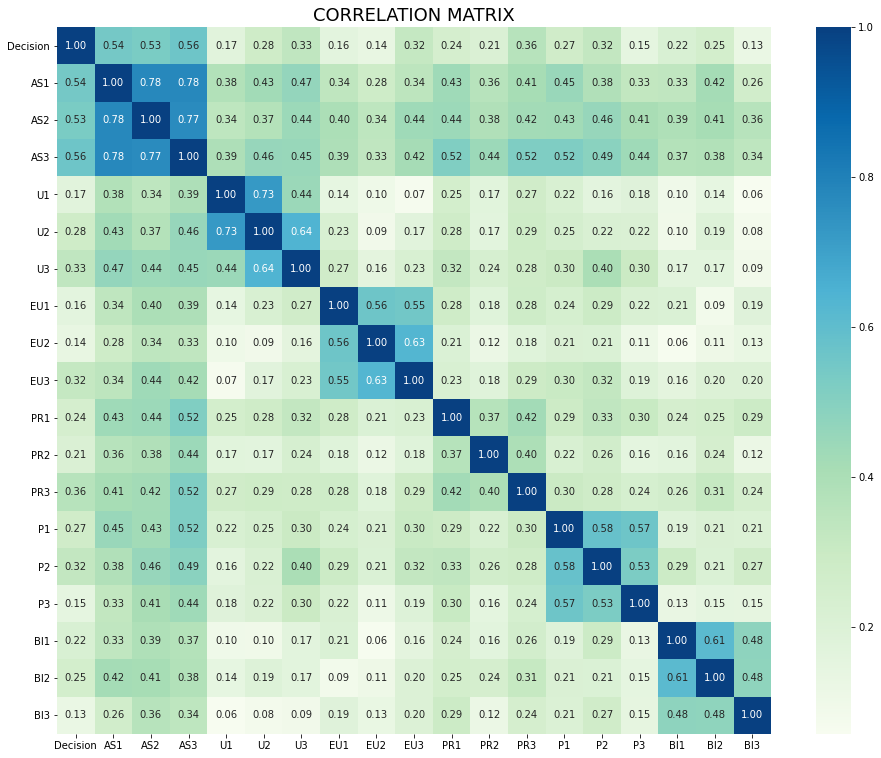

In [30]:
# Loại bỏ cột từ DataFrame
df = data.drop(['AS', 'U', 'EU','P', 'BI'], axis=1)

# Tính ma trận tương quan
correlation_matrix = df.corr()
# plt.figure(figsize=(16, 13))
fig, ax = plt.subplots(figsize=(16, 13))
# Vẽ bảng tương quan
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu',fmt=".2f", ax=ax)
ax.set_title("CORRELATION MATRIX", fontsize=18)


In [31]:
# Tách biến độc lập và biến phụ thuộc
X = data[['U1','U2','U3','EU1', 'EU2', 'EU3', 'P1', 'P2', 'P3', 'BI1', 'BI2','BI3','PR1', 'PR2', 'PR3', 'AS1', 'AS2', 'AS3']]
y = data['Decision']


In [32]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
np.random.seed(42) # thiết lập seed là 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **LOGISTIC REGRESSION**

In [33]:
# Xây dựng mô hình Logistic regression
LR_classifier = LogisticRegression(multi_class='ovr',random_state=42)

# Đưa giá trị X_train và y_train vào mô hình Logistic regression
LR_classifier.fit(X_train, y_train)

# Dự báo giá trị biến phụ thuộc
y_pred = LR_classifier.predict(X_test)

print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
[[14  5]
 [10 15]] 

Classification report:
              precision    recall  f1-score   support

           0       0.58      0.74      0.65        19
           1       0.75      0.60      0.67        25

    accuracy                           0.66        44
   macro avg       0.67      0.67      0.66        44
weighted avg       0.68      0.66      0.66        44

Logistic Regression accuracy:  0.6591


In [34]:
# Hiệu chỉnh mô hình
accury_lr = 0
threshold = 0
for i in np.arange(0.1, 1.0, 0.05):
    LR_classifier = LogisticRegression(multi_class='ovr',penalty='l2', C=i,random_state=42)
    LR_classifier.fit(X_train, y_train)
    y_pred = LR_classifier.predict(X_test)
    
    # logic
    accury_results = round(accuracy_score(y_test, y_pred),4)
    if accury_results > accury_lr:
        accury_lr = accury_results
        threshold = i
        threshold = round(threshold,2)
        
print(f'Với threshold = {threshold} thì mô hình Decision Tree có accuracy = {accury_lr}')

Với threshold = 0.1 thì mô hình Decision Tree có accuracy = 0.6818


In [35]:
# Xây dựng mô hình Logistic regression
LR_classifier = LogisticRegression(multi_class='ovr',penalty='l2', C=threshold,random_state=42)

# Đưa giá trị X_train và y_train vào mô hình Logistic regression
LR_classifier.fit(X_train, y_train)

# Dự báo giá trị biến phụ thuộc
y_pred = LR_classifier.predict(X_test)

# In các thông số quan trọng

# Ma trận bối rối
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred),'\n')

# Các chỉ số báo cáo
print('Classification report:')
print(classification_report(y_test,y_pred))

# Tỉ lệ chính xác accuracy
print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
[[13  6]
 [ 8 17]] 

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.74      0.68      0.71        25

    accuracy                           0.68        44
   macro avg       0.68      0.68      0.68        44
weighted avg       0.69      0.68      0.68        44

Logistic Regression accuracy:  0.6818


        Thay đổi threshold đã làm tăng accuracy từ 0.6591 tăng lên 0.6818

In [36]:
def plot_confusion_matrix1(confusion_matrix, labels):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
                xticklabels=labels, yticklabels=labels, annot_kws={"fontsize": 18})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of Logistic model')
    plt.show()

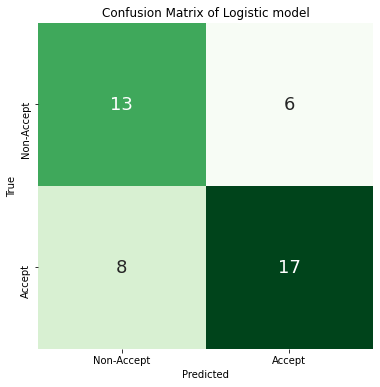

In [37]:
labels = ['Non-Accept', 'Accept']
plot_confusion_matrix1(confusion_matrix(y_test,y_pred), labels)

In [38]:
# # ROC
# y_pred_prob_test = LR_classifier.predict_proba(x_test)[:, 1]
# fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
# roc_auc = auc(fpr, tpr)

# _plot_roc_curve(fpr, tpr, thres, roc_auc)

In [39]:
# # Lấy danh sách tên thuộc tính
# feature_names = X_train.columns

# # Lấy danh sách giá trị quan trọng của thuộc tính
# feature_importance = LR_classifier.coef_[0]

# # Tạo DataFrame để lưu trữ bảng thuộc tính quan trọng
# importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# # Sắp xếp theo giá trị quan trọng giảm dần
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # In bảng thuộc tính quan trọng
# importance_df

In [40]:
# # Vẽ biểu đồ cột thuộc tính quan trọng
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance - Logistic Regression')
# plt.show()


# **DECISION TREE**

In [41]:
# Xây dựng mô hình Decision Tree
DT_classifier = DecisionTreeClassifier(random_state=42)
# DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(X_test)

# In các thông số quan trọng

# Ma trận bối rối
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')

# Báo cáo phân loại
print(f'Report model:\n{classification_report(y_test,y_pred)}')

# Tỉ lệ chính xác accuracy
print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion Matrix:
[[12  7]
 [ 7 18]]

Report model:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.72      0.72      0.72        25

    accuracy                           0.68        44
   macro avg       0.68      0.68      0.68        44
weighted avg       0.68      0.68      0.68        44

Decision Tree accuracy:  0.6818


In [42]:
# Hiệu chỉnh mô hình
accury_dt = 0
depth = 0
for i in range(1,50):
    DT_classifier = DecisionTreeClassifier(max_depth=i,random_state=42)
    DT_classifier.fit(X_train, y_train)
    y_pred = DT_classifier.predict(X_test)
    accury_results = round(accuracy_score(y_test, y_pred),4)
    if accury_results > accury_dt:
        accury_dt = accury_results
        depth = i

print(f'Với max depth = {depth} thì mô hình Decision Tree có accuracy = {accury_dt}')

Với max depth = 7 thì mô hình Decision Tree có accuracy = 0.6818


In [43]:
# Xây dựng mô hình Decision Tree
DT_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
DT_classifier.fit(X_train, y_train)

# Dự báo giá trị biến phụ thuộc
y_pred = DT_classifier.predict(X_test)

# In các thông số quan trọng

# Ma trận bối rối
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')

# Báo cáo phân loại
print(f'Report model:\n{classification_report(y_test,y_pred)}')

# Tỉ lệ chính xác accuracy
print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion Matrix:
[[12  7]
 [ 7 18]]

Report model:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.72      0.72      0.72        25

    accuracy                           0.68        44
   macro avg       0.68      0.68      0.68        44
weighted avg       0.68      0.68      0.68        44

Decision Tree accuracy:  0.6818


In [44]:
def plot_confusion_matrix2(confusion_matrix, labels):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
                xticklabels=labels, yticklabels=labels, annot_kws={"fontsize": 18})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of Decision Tree model')
    plt.show()

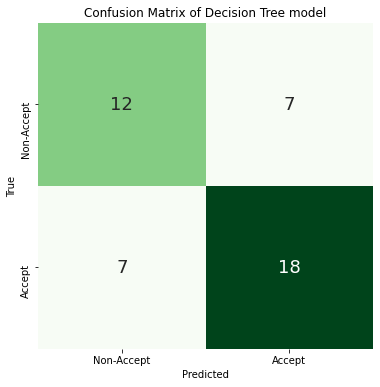

In [45]:
labels = ['Non-Accept', 'Accept']
plot_confusion_matrix2(confusion_matrix(y_test,y_pred), labels)

ROC&AUC

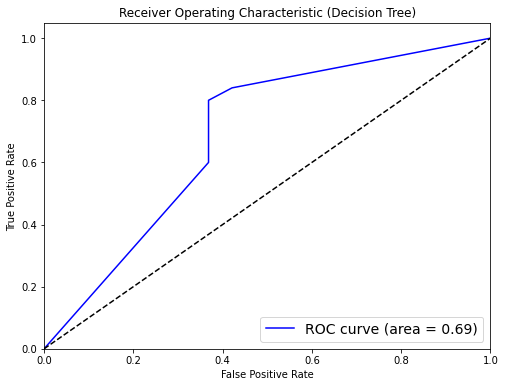

In [46]:
# Tính toán xác suất dự đoán của mô hình
y_pred_prob = DT_classifier.predict_proba(X_test)[:, 1]

# Tính toán FPR, TPR và ngưỡng
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Tính toán AUC
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC hoàn chỉnh với AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Đường đường chéo ngẫu nhiên (diagonal)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right", fontsize=14)
plt.show()

Feature Importance

In [47]:
# Lấy danh sách tên thuộc tính
feature_names = X_train.columns

# Lấy danh sách giá trị quan trọng của thuộc tính
feature_importance = DT_classifier.feature_importances_

# Tạo DataFrame để lưu trữ bảng thuộc tính quan trọng
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sắp xếp theo giá trị quan trọng giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# In bảng thuộc tính quan trọng
importance_df

,Feature,Importance
17,AS3,0.424063
3,EU1,0.102450
5,EU3,0.082046
11,BI3,0.082040
13,PR2,0.046809
16,AS2,0.039948
15,AS1,0.039406
0,U1,0.037661
2,U3,0.037537
10,BI2,0.027599


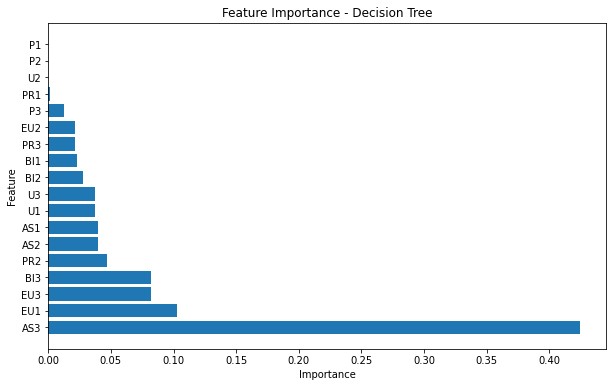

In [48]:
# Vẽ biểu đồ cột thuộc tính quan trọng
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.show()


# **RANDOM FOREST**

In [49]:
# Tạo mô hình Random Forest với 100 cây quyết định
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
# Huấn luyện mô hình trên tập huấn luyện
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Dự đoán trên tập kiểm tra
y_pred = rfc.predict(X_test)

In [52]:
# Ma trận bối rối
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')

# Báo cáo phân loại
print(f'Report model:\n{classification_report(y_test,y_pred)}')

# Tỉ lệ chính xác accuracy
print('Random Forest accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion Matrix:
[[15  4]
 [ 8 17]]

Report model:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.81      0.68      0.74        25

    accuracy                           0.73        44
   macro avg       0.73      0.73      0.73        44
weighted avg       0.74      0.73      0.73        44

Random Forest accuracy:  0.7273


In [53]:
# Hiệu chỉnh mô hình
accury_rf = 0
depth = 0
for i in range(1,50):
    RF_classifier = RandomForestClassifier(bootstrap=True, criterion='gini',
    max_depth=i, max_features='auto', min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0,n_jobs=-1, random_state=42)

    RF_classifier.fit(X_train, y_train)

    y_pred = RF_classifier.predict(X_test)

    accury_results = round(accuracy_score(y_test, y_pred),4)
    if accury_results > accury_rf:
        accury_rf = accury_results
        depth = i

print(f'Với max depth = {depth} thì mô hình Decision Tree có accuracy = {accury_rf}')

Với max depth = 9 thì mô hình Decision Tree có accuracy = 0.7273


In [54]:
# Xây dựng mô hình Random Forest
RF_classifier = RandomForestClassifier(random_state=42,max_depth=depth)
RF_classifier.fit(X_train, y_train.ravel())

# Dự báo giá trị biến phụ thuộc
y_pred = RF_classifier.predict(X_test)

# Ma trận bối rối
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}\n')

# Báo cáo phân loại
print(f'Report model:\n{classification_report(y_test,y_pred)}')

# Tỉ lệ chính xác accuracy
print('Random Forest accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion Matrix:
[[15  4]
 [ 8 17]]

Report model:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.81      0.68      0.74        25

    accuracy                           0.73        44
   macro avg       0.73      0.73      0.73        44
weighted avg       0.74      0.73      0.73        44

Random Forest accuracy:  0.7273


In [55]:
def plot_confusion_matrix3(confusion_matrix, labels):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
                xticklabels=labels, yticklabels=labels, annot_kws={"fontsize": 18})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of Random Forest model')
    plt.show()

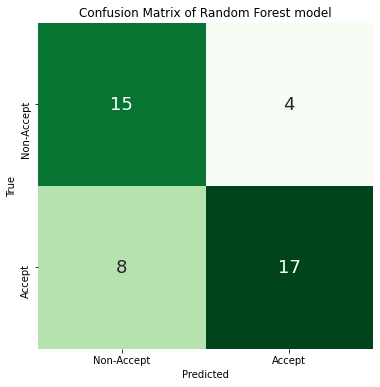

In [56]:
labels = ['Non-Accept', 'Accept']
plot_confusion_matrix3(confusion_matrix(y_test,y_pred), labels)

**Vẽ mẫu 1 cây**

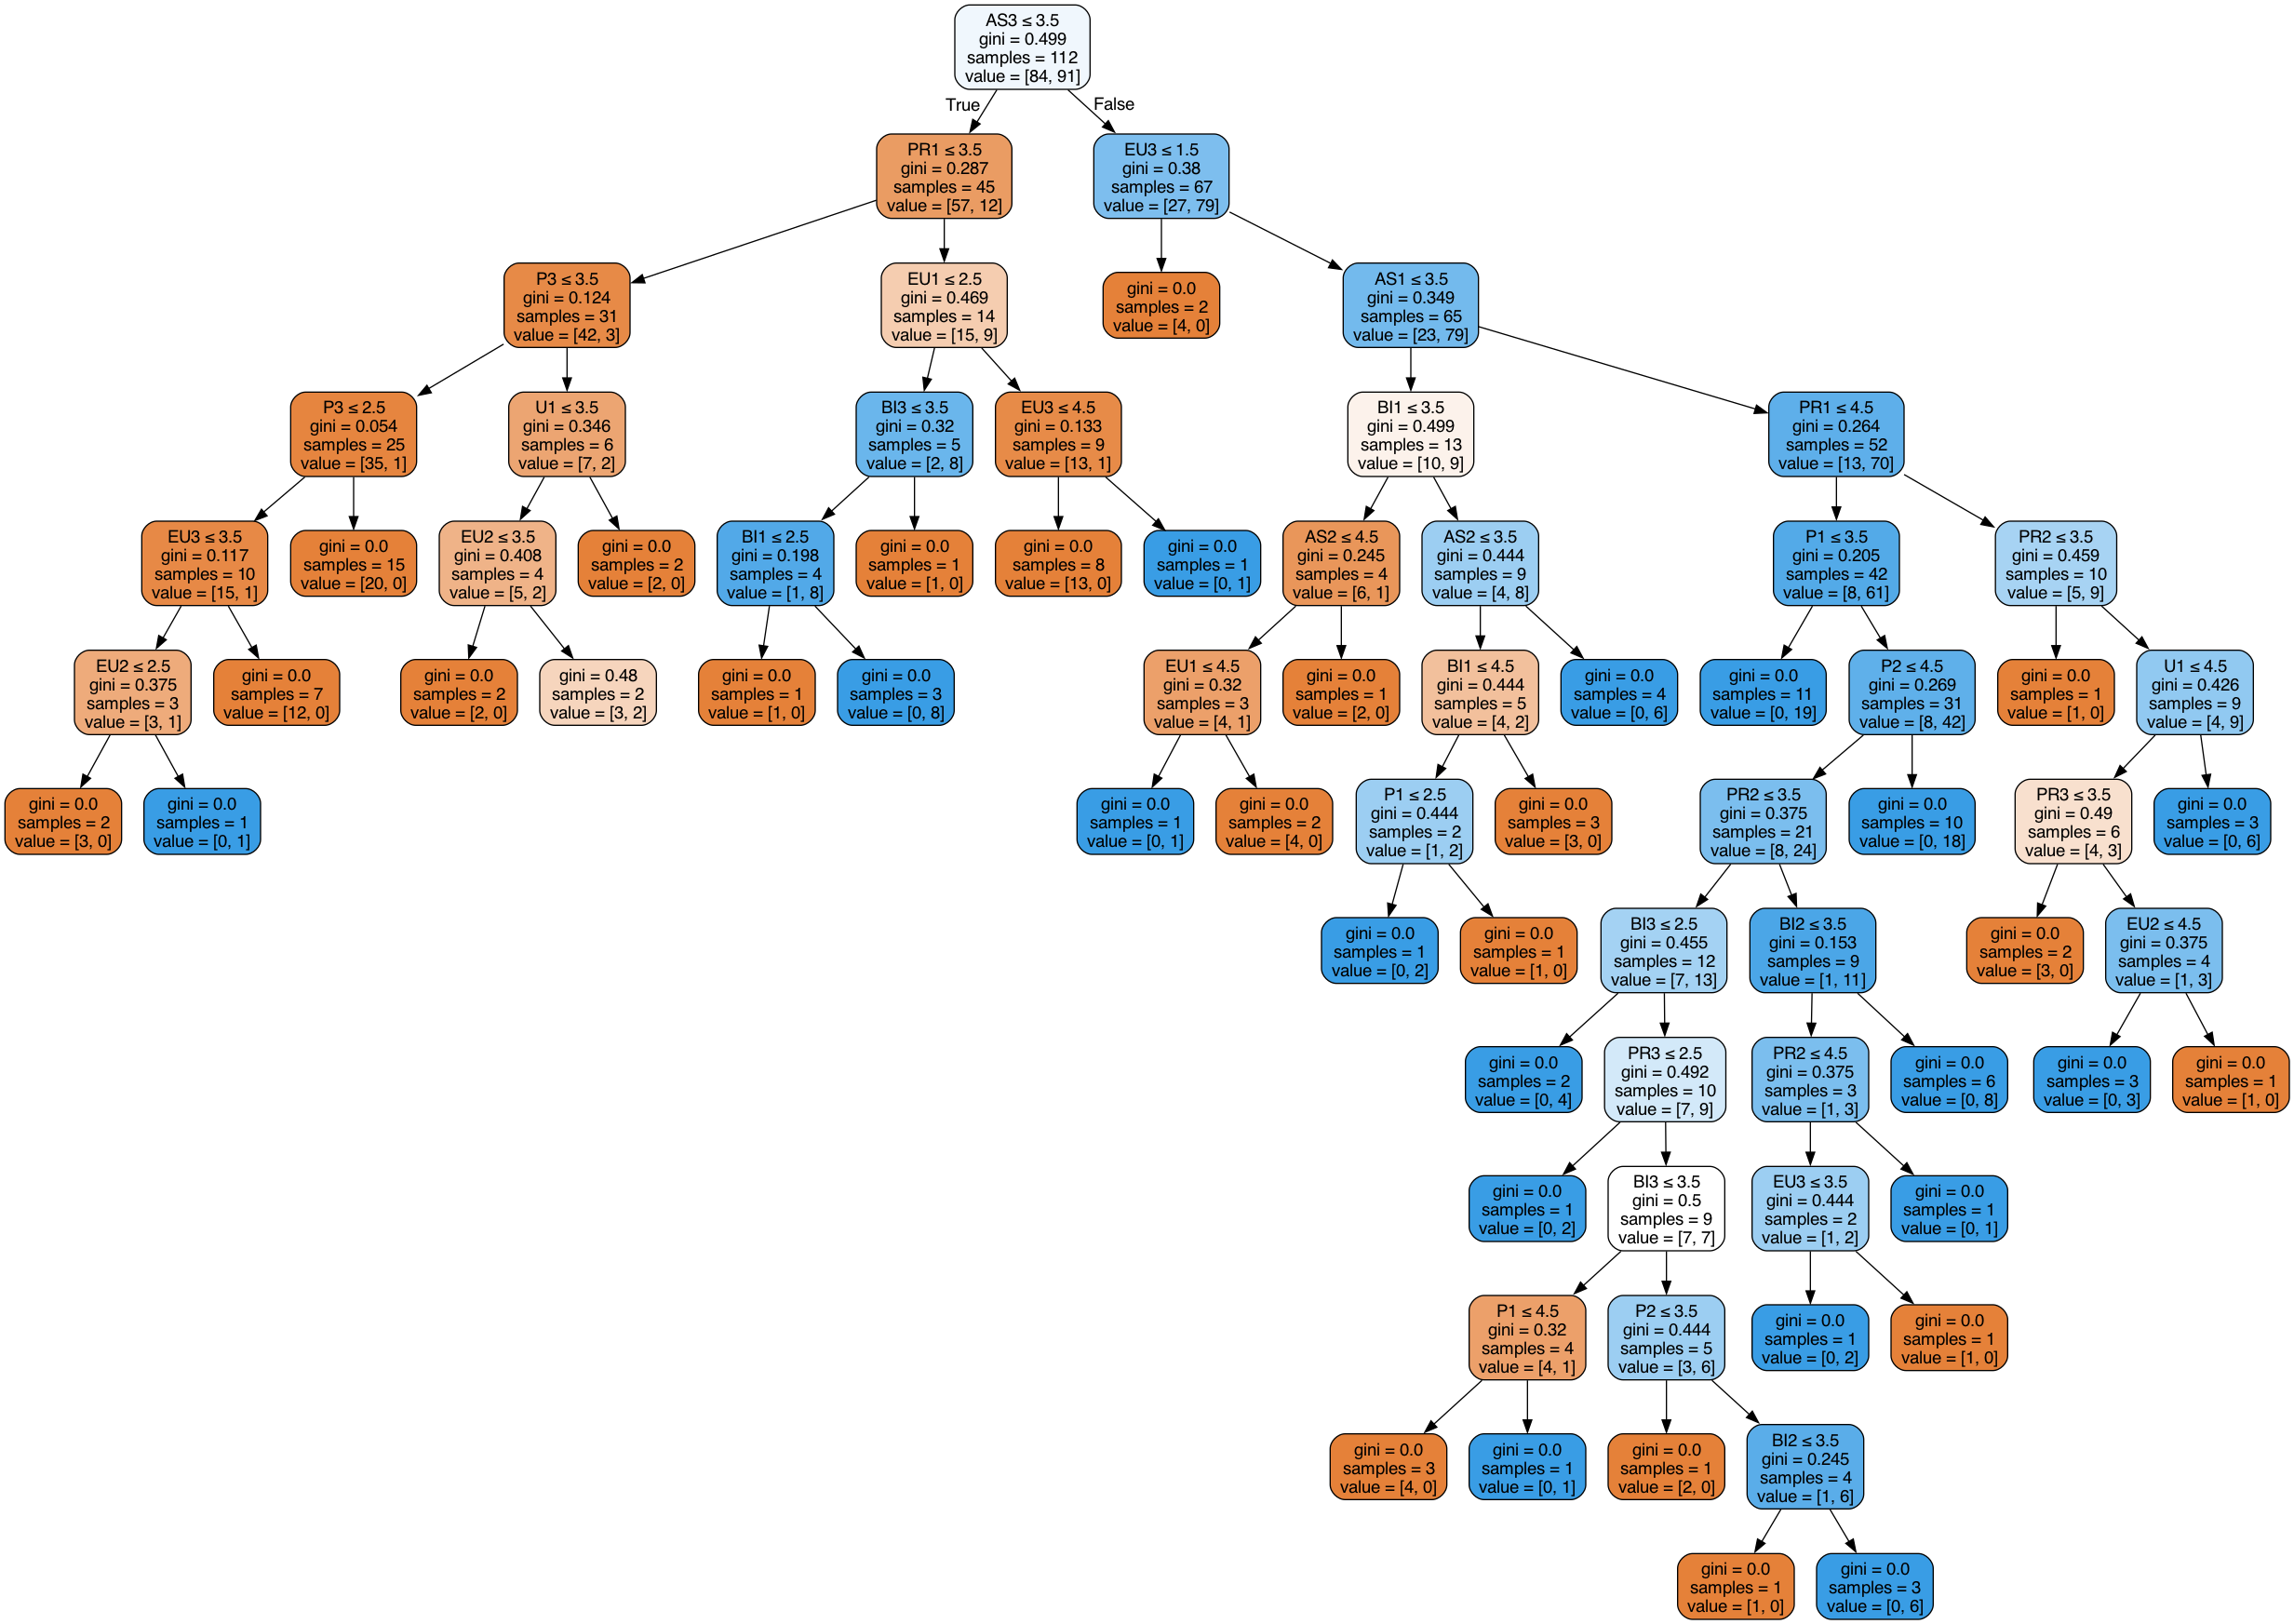

In [57]:
dot_data = export_graphviz(
    rfc.estimators_[1], 
    out_file=None, 
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ROC&AUC


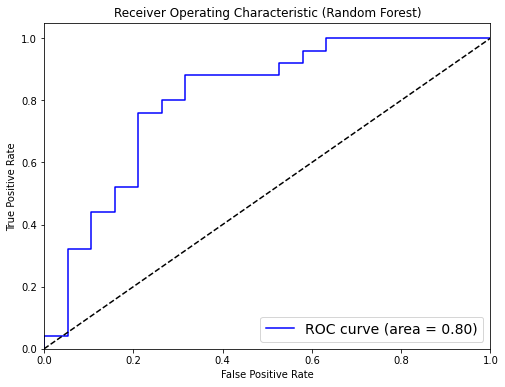

In [58]:
# Tính toán xác suất dự đoán của mô hình
y_pred_prob = RF_classifier.predict_proba(X_test)[:, 1]

# Tính toán FPR, TPR và ngưỡng
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Tính toán AUC
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC hoàn chỉnh với AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Đường đường chéo ngẫu nhiên (diagonal)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right", fontsize=14)
plt.show()

Feature Importance

In [59]:
# Lấy danh sách tên thuộc tính
feature_names = X_train.columns

# Lấy danh sách giá trị quan trọng của thuộc tính
feature_importance = RF_classifier.feature_importances_

# Tạo DataFrame để lưu trữ bảng thuộc tính quan trọng
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sắp xếp theo giá trị quan trọng giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# In bảng thuộc tính quan trọng
importance_df

,Feature,Importance
17,AS3,0.178285
16,AS2,0.092028
15,AS1,0.083053
5,EU3,0.066735
10,BI2,0.063115
13,PR2,0.054388
14,PR3,0.053204
2,U3,0.051915
4,EU2,0.048554
12,PR1,0.046348


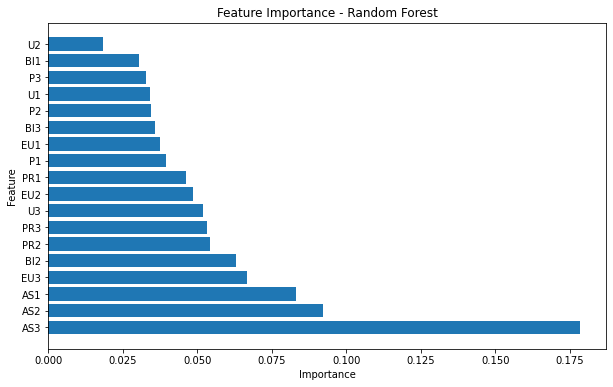

In [60]:
# Vẽ biểu đồ cột thuộc tính quan trọng
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()


# **XỬ LÝ PHÁT SINH**

In [61]:
# from PIL import Image

# # Import các hình vào
# image1 = Image.open("ROC1.png")
# image2 = Image.open("ROC2.png")
# image3 = Image.open("ROC3.png")

# # Tính toán kích thước của khung
# frame_width = image1.width + image2.width + image3.width
# frame_height = max(image1.height, image2.height, image3.height)

# # Tạo khung mới với kích thước phù hợp
# frame = Image.new("RGB", (frame_width, frame_height))

# # Ghép các hình vào khung
# frame.paste(image1, (0, 0))
# frame.paste(image2, (image1.width, 0))
# frame.paste(image3, (image1.width + image2.width, 0))

# # Hiển thị khung
# frame.show()


FileNotFoundError: [Errno 2] No such file or directory: 'ROC1.png'